******************[ 1. 파일 읽기 ]******************
        fit  user_id bust size  item_id  weight  rating     rented for  \
0       fit   420272       34d  2260466  137lbs    10.0       vacation   
1       fit   273551       34b   153475  132lbs    10.0          other   
2       fit   360448       NaN  1063761     NaN    10.0          party   
3       fit   909926       34c   126335  135lbs     8.0  formal affair   
4       fit   151944       34b   616682  145lbs    10.0        wedding   
...     ...      ...       ...      ...     ...     ...            ...   
192539  fit    66386      34dd  2252812  140lbs    10.0           work   
192540  fit   118398       32c   682043  100lbs    10.0           work   
192541  fit    47002       36a   683251  135lbs     6.0       everyday   
192542  fit   961120       36c   126335  165lbs    10.0        wedding   
192543  fit   123612       36b   127865  155lbs    10.0        wedding   

                                              review_text     

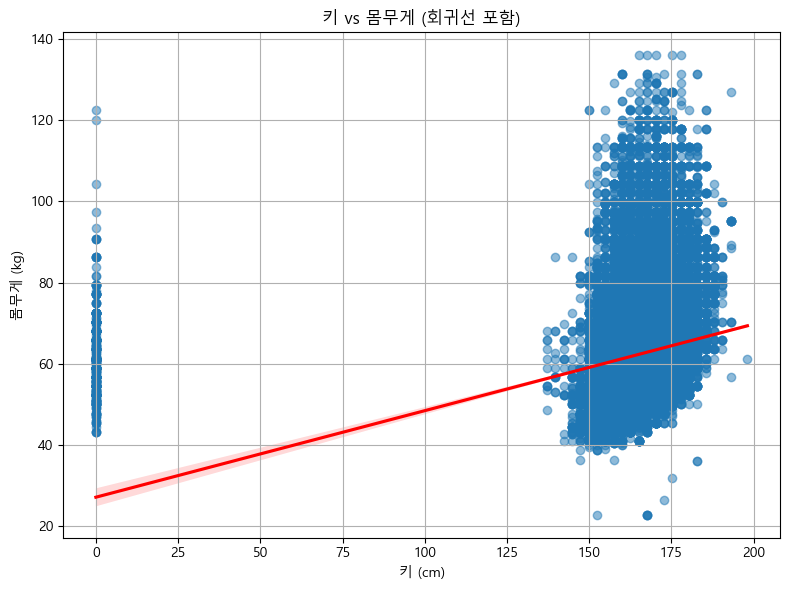

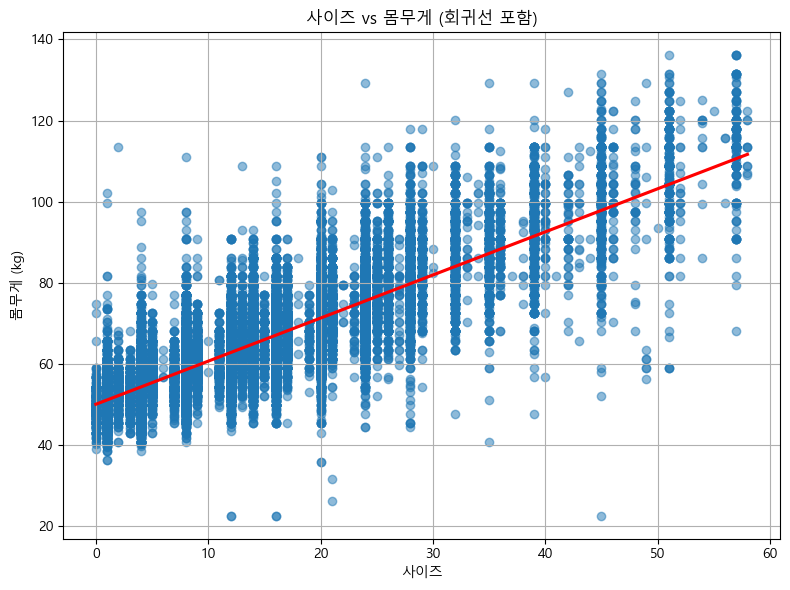

******************[ 4-1. None 값 보간 ]******************
(1) None 값 확인: 
fit                0
user_id            0
item_id            0
weight (kg)    29982
rating            82
body_type      14637
height (cm)        0
size               0
age              960
dtype: int64
(2) 전체 행(인스턴스)의 개수:  192544
(3) 결과:
fit            0
user_id        0
item_id        0
weight (kg)    0
rating         0
body_type      0
height (cm)    0
size           0
age            0
dtype: int64
(3) 보간 후 전체 행(인스턴스)의 개수:  192544 , 삭제된 행의 수:  0 , 삭제된 데이터 비율(%): 0.00%
******************[ 4. 시각화 ]******************


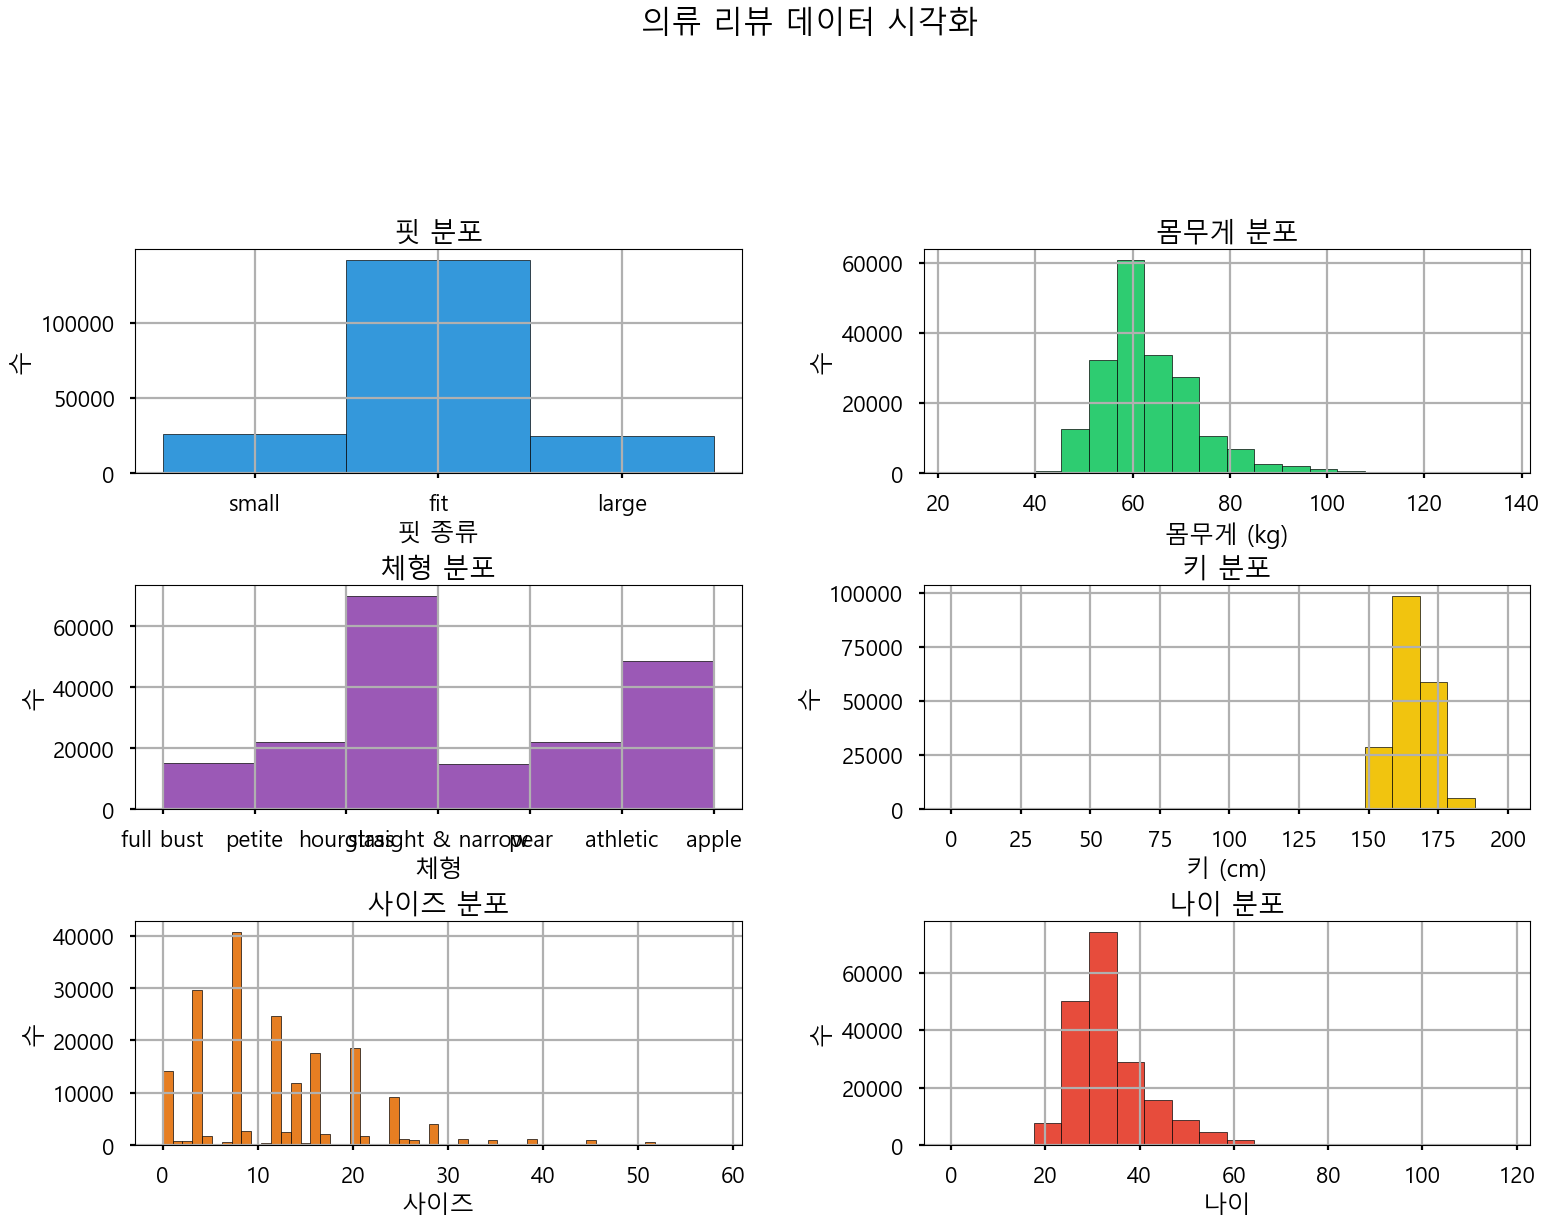

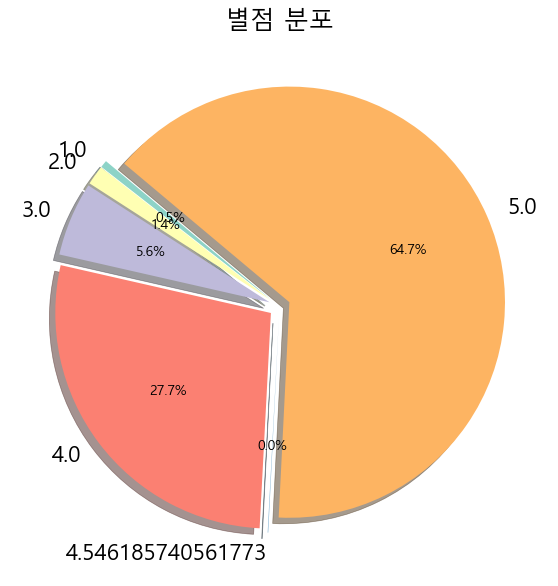

In [2]:
from itertools import count

import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # 시각화 패키지
from matplotlib.pyplot import figure
# from sklearn.preprocessing import StandardScaler
from win32con import NULL_BRUSH
import seaborn as sns


import matplotlib.gridspec as gridspec

# 폰트/마이너스 기호 깨짐 방지
matplotlib.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
def next_line(next):
    print("******************[",next,"]******************")
def in_line(title):
    print("------------------[",title,"]------------------")
next_line("1. 파일 읽기")
# 1. 파일 읽기
df = pd.read_csv("../renttherunway_data.csv")
print(df)

next_line("2. 사용할 특성들만 뽑기 & 컬럼명 변경")
# 2. 사용할 특성들만 뽑기 -> fit, user_id, bust size, item_id, weight, rating, body type, category, height, size, age
data = df[['fit', 'user_id',
           # 'bust size',
           'item_id', 'weight', 'rating', 'body type',
           # 'category',
            'height', 'size', 'age']].copy()
# 컬럼명 명확히
data.rename(columns={
    'weight':'weight (kg)',
    # 'bust size':'bust_size',
    'body type':'body_type',
    'height':'height (cm)'}, inplace=True)
print(data)

next_line("3. 데이터 전처리")
# 3. 데이터 전처리
# 3-1. 인코딩
print("3-1. 인코딩")
"""
    fit
"""
in_line("3-1-1. fit")
# 3-1-1. fit
# 종류 확인 -> {'small', 'large', 'fit'}
print("(1) 종류 확인: ", set(data['fit']))

# 매핑
fit_mapping = {
    'small' : 0,
    'fit' : 1,
    'large' : 2
}
data['fit'] = data.loc[:, 'fit'].map(fit_mapping)
print("(2) 결과:")
print(data['fit'])

in_line("3-1-2. weight")
# 3-1-2. weight
# 파운드에서 kg으로 변환 (1 파운드 == 0.453592 kg)
def lb_to_kg_trans(lb_str):
    # 숫자만 추출 (예: '123lbs' -> 123)
    if isinstance(lb_str, str) and 'lbs' in lb_str:
        number = int(lb_str.replace('lbs', '').strip())
        return round(number * 0.453592, 2)  # 소수점 2자리까지
    return None  # 예외 처리

data['weight (kg)'] = data.loc[:, 'weight (kg)'].apply(lb_to_kg_trans)  # 변환되어 저장
print("(1) 결과:")
print(data['weight (kg)'])

in_line("3-1-3. rating")
# 3-1-3. rating
# 범위를 1~10에서 1~5로 스케일 변화
def rating_scale_trans(rating):
    return rating/2
data['rating'] = data.loc[:, 'rating'].apply(rating_scale_trans)  # 변환되어 저장
print("(1) 결과: ", data['rating'])

in_line("3-1-4. body_type")
# 3-1-4. body_type
# 종류 확인 -> {'full bust', 'petite', 'hourglass', 'straight & narrow', 'pear', nan, 'athletic', 'apple'}
print("(1) 종류 확인", set(data['body_type']))

# 매핑
body_type_mapping = {
    'full bust':0,
    'petite':1,
    'hourglass':2,
    'straight & narrow':3,
    'pear':4,
    'athletic':5,
    'apple':6
}
data['body_type'] = data.loc[:, 'body_type'].map(body_type_mapping)
print("(2) 결과:")
print(data['body_type'])

# in_line("3-1-5. category")
# # 3-1-5. category
# # 종류 확인 -> {'top', 'cardigan', 'sweatshirt', 'jogger', 'parka', 'skirt', 'midi', 'sweatershirt', 'buttondown', 'jeans', 'kaftan', 'kimono', 'culotte', 'dress', 'shirt', 'cami', 'legging', 'overalls', 'coat', 'down', 'trouser', 'leggings', 't-shirt', 'for', 'henley', 'jacket', 'romper', 'bomber', 'peacoat', 'frock', 'skirts', 'crewneck', 'sweater', 'gown', 'jumpsuit', 'tee', 'skort', 'cape', 'combo', 'culottes', 'knit', 'hoodie', 'shirtdress', 'maxi', 'blazer', 'poncho', 'overcoat', 'blouson', 'turtleneck', 'pant', 'shift', 'vest', 'caftan', 'tunic', 'tight', 'sweatpants', 'tank', 'blouse', 'pullover', 'suit', 'trench', 'print', 'duster', 'mini', 'ballgown', 'sheath', 'trousers', 'pants'}
# print("(1) 종류 확인: ", set(data['category']))

# 매핑

# category_mapping = {
#     'top',
#     'cardigan',
#     'sweatshirt',
#     'jogger',
#     'parka',
#     'skirt',
#     'midi',
#     'sweatershirt',
#     'buttondown',
#     'jeans',
#     'kaftan',
#     'kimono',
#     'culotte',
#     'dress',
#     'shirt',
#     'cami',
#     'legging',
#     'overalls',
#     'coat',
#     'down',
#     'trouser',
#     'leggings',
#     't-shirt',
#     'for',
#     'henley',
#     'jacket',
#     'romper',
#     'bomber',
#     'peacoat',
#     'frock',
#     'skirts',
#     'crewneck',
#     'sweater',
#     'gown',
#     'jumpsuit',
#     'tee',
#     'skort',
#     'cape',
#     'combo',
#     'culottes',
#     'knit',
#     'hoodie', 'shirtdress', 'maxi', 'blazer', 'poncho', 'overcoat', 'blouson', 'turtleneck', 'pant', 'shift', 'vest', 'caftan', 'tunic', 'tight', 'sweatpants', 'tank', 'blouse', 'pullover', 'suit', 'trench', 'print', 'duster', 'mini', 'ballgown', 'sheath', 'trousers', 'pants'}

in_line("3-1-6. height")
# 3-1-6. height
# 1 피트 = 30.48 cm, 1 인치 = 2.54 cm
def height_trans(height):
    if height is None:
        return None
    feet = 0.0
    inch = 0.0
    if isinstance(height, str) and "'" in height:
        feet = height[:height.index("'")]
        feet = float(feet) * 30.48

    if isinstance(height, str) and "\"" in height:
        inch = height[height.index(" ")+1:height.index("\"")]
        inch = float(inch) * 2.54
    return (feet + inch)

data['height (cm)'] = data.loc[:, 'height (cm)'].apply(height_trans)
print("(1) 결과:")
print(data["height (cm)"])

in_line("3-1-7. size")
# 3-1-7. size
print("(1) max size: ", max(data['size']))
print("(2) min size: ", min(data['size']))

# 인코딩 정보 디코딩
inv_fit_mapping = {v: k for k, v in fit_mapping.items()}
inv_body_type_mapping = {v: k for k, v in body_type_mapping.items()}
in_line("data type 확인: ")
print(data.dtypes)

next_line("4-2. 상관 관계 확인")
# NaN 값이 있는 행 제거 후 시각화
scatter_data = data[['height (cm)', 'weight (kg)', 'size']].dropna()

in_line("4-2-1. 몸무게와 키")
# 몸무게와 키의 상관 관계
corr = scatter_data.corr().loc['height (cm)', 'weight (kg)']
print("상관계수:", corr)
def correlation_analysis(corr_input):
    if 0.0 <= corr_input <= 0.1:
        print("거의 상관 없음")
    elif 0.1 < corr_input <= 0.3:
        print("약한 상관관계 (weak)")
    elif 0.3 < corr_input <= 0.7:
        print("중간 정도 상관관계 (moderate)")
    elif 0.7 < corr_input <= 1.0:
        print("강한 상관관계 (strong)")
    else:
        print("상관계수 값이 범위를 벗어났습니다.")

correlation_analysis(corr)

in_line("몸무게와 사이즈")
corr = scatter_data.corr().loc['weight (kg)', 'size']
print("상관계수:", corr)
correlation_analysis(corr)

# 상관 관계 시각화
# 회귀선 포함된 산점도
plt.figure(figsize=(8, 6))
sns.regplot(
    x='height (cm)',
    y='weight (kg)',
    data=scatter_data,
    scatter_kws={'alpha':0.5},   # 점 투명도
    line_kws={'color':'red'}     # 회귀선 스타일
)
plt.title("키 vs 몸무게 (회귀선 포함)")
plt.xlabel("키 (cm)")
plt.ylabel("몸무게 (kg)")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.regplot(
    x='size',
    y='weight (kg)',
    data=scatter_data,
    scatter_kws={'alpha':0.5},   # 점 투명도
    line_kws={'color':'red'}     # 회귀선 스타일
)
plt.title("사이즈 vs 몸무게 (회귀선 포함)")
plt.xlabel("사이즈")
plt.ylabel("몸무게 (kg)")
plt.grid(True)
plt.tight_layout()
plt.show()


next_line("4-1. None 값 보간")
# 총 null 값 확인
print("(1) None 값 확인: ")
print(data.isnull().sum())
before_len = len(data)
print("(2) 전체 행(인스턴스)의 개수: ", before_len)
# 각 size별 평균 몸무게 계산 (NaN 제외)
size_weight_means = data.groupby('size')['weight (kg)'].mean()

# NaN 값 채우기
def fill_weight(row):
    if pd.isna(row['weight (kg)']):
        return size_weight_means.get(row['size'], None)  # 해당 사이즈 없으면 None
    else:
        return row['weight (kg)']

# 적용
data['weight (kg)'] = data.apply(fill_weight, axis=1)
# data['weight (kg)'] = data['weight (kg)'].fillna(data['weight (kg)'].mean())
data['rating'] = data['rating'].fillna(data['rating'].mean())
data['body_type'] = data['body_type'].fillna(data['body_type'].mean())
data['age'] = data['age'].fillna(data['age'].mean())
print("(3) 결과:")
print(data.isnull().sum())
print("(3) 보간 후 전체 행(인스턴스)의 개수: ", len(data),
      ", 삭제된 행의 수: ", before_len - len(data),
      ", 삭제된 데이터 비율(%): {:.2f}%".format((before_len - len(data)) / before_len * 100))

next_line("4. 시각화")
# 4. 시각화
matplotlib.rc('font', family='Malgun Gothic')  # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 기호 깨짐 방지

# fig = plt.figure(5, (8, 6))

# 세련된 스타일 적용
plt.style.use("seaborn-v0_8-poster")  # 전체 폰트/스타일 깔끔하게

# 전체 도화지 사이즈 설정
fig = plt.figure(figsize=(18, 16))
fig.suptitle("의류 리뷰 데이터 시각화", fontsize=22, y=1.03)  # y를 올려서 겹침 방지

# GridSpec 설정
gs = gridspec.GridSpec(4, 2, figure=fig, hspace=0.5, wspace=0.3)

# subplot 설정
fit_ax = fig.add_subplot(gs[0, 0])
weight_ax = fig.add_subplot(gs[0, 1])
body_type_ax = fig.add_subplot(gs[1, 0])
height_ax = fig.add_subplot(gs[1, 1])
size_ax = fig.add_subplot(gs[2, 0])
age_ax = fig.add_subplot(gs[2, 1])

# === 히스토그램별 시각화 ===

# 핏
fit_ax.hist(data['fit'], bins=[-0.5, 0.5, 1.5, 2.5], color="#3498db", edgecolor='black')
fit_ax.set_xticks(list(inv_fit_mapping.keys()))
fit_ax.set_xticklabels([inv_fit_mapping[i] for i in inv_fit_mapping.keys()])
fit_ax.set_title("핏 분포")
fit_ax.set_xlabel("핏 종류")
fit_ax.set_ylabel("수")
fit_ax.grid(True)

# 몸무게
weight_ax.hist(data['weight (kg)'], bins=20, color="#2ecc71", edgecolor='black')
weight_ax.set_title("몸무게 분포")
weight_ax.set_xlabel("몸무게 (kg)")
weight_ax.set_ylabel("수")
weight_ax.grid(True)

# 체형
body_type_ax.hist(data['body_type'], bins=6, color="#9b59b6", edgecolor='black')
body_type_ax.set_xticks(list(inv_body_type_mapping.keys()))
body_type_ax.set_xticklabels([inv_body_type_mapping[i] for i in inv_body_type_mapping.keys()])
body_type_ax.set_title("체형 분포")
body_type_ax.set_xlabel("체형")
body_type_ax.set_ylabel("수")
body_type_ax.grid(True)

# 키
height_ax.hist(data['height (cm)'], bins=20, color="#f1c40f", edgecolor='black')
height_ax.set_title("키 분포")
height_ax.set_xlabel("키 (cm)")
height_ax.set_ylabel("수")
height_ax.grid(True)

# 사이즈
size_ax.hist(data['size'], bins=len(data['size'].unique()), color="#e67e22", edgecolor='black')
size_ax.set_title("사이즈 분포")
size_ax.set_xlabel("사이즈")
size_ax.set_ylabel("수")
size_ax.grid(True)

# 나이
age_ax.hist(data['age'], bins=20, color="#e74c3c", edgecolor='black')
age_ax.set_title("나이 분포")
age_ax.set_xlabel("나이")
age_ax.set_ylabel("수")
age_ax.grid(True)

# 막대 그래프 전체 출력
plt.show()

# === 별점 파이차트 (별도 figure) ===
rating_counts = data['rating'].dropna().value_counts().sort_index()
rating_labels = rating_counts.index
rating_values = rating_counts.values
explode = [0.05] * len(rating_values)

plt.figure(figsize=(7, 7))
plt.pie(rating_values, labels=rating_labels, autopct='%1.1f%%',
        explode=explode, shadow=True, startangle=140, colors=plt.cm.Set3.colors)
plt.title("별점 분포", fontsize=18)

plt.show()


# # 시각화 1: 막대 그래프(누적)
# # 전체 도화지 사이즈 설정
# fig = plt.figure(figsize=(16, 14))  # 전체 figure 사이즈 조절
#
# # GridSpec으로 세밀하게 레이아웃 설정 (행 4개, 열 2개)
# gs = gridspec.GridSpec(4, 2, figure=fig, hspace=0.8, wspace=0.2)  # 패딩 설정
#
# # 각 subplot 배치
# fit_ax = fig.add_subplot(gs[0, 0])     # 1행 1열
# weight_ax = fig.add_subplot(gs[0, 1])  # 1행 2열
# # rating_ax = fig.add_subplot(gs[1, :])  # 2행 전체 (1: span all 2 columns)
# body_type_ax = fig.add_subplot(gs[1, 0])
# height_ax = fig.add_subplot(gs[1, 1])
# size_ax = fig.add_subplot(gs[2, 0])
# age_ax = fig.add_subplot(gs[2, 1])
#
# # === 히스토그램별 시각화 ===
# fit_ax.hist(data['fit'], bins=[-0.5, 0.5, 1.5, 2.5])
# fit_ax.set_xticks(list(inv_fit_mapping.keys()))
# fit_ax.set_xticklabels([inv_fit_mapping[i] for i in inv_fit_mapping.keys()])
# fit_ax.set_xlabel("핏 종류")
# fit_ax.set_ylabel("누적 수")
# fit_ax.set_title("핏 분포")
#
# weight_ax.hist(data['weight (kg)'])
# weight_ax.set_xlabel("몸무게 (kg)")
# weight_ax.set_ylabel("누적 수")
# weight_ax.set_title("몸무게 분포")
#
# # rating_ax.hist(data['rating'])
# # rating_ax.set_xlabel("별점")
# # rating_ax.set_ylabel("누적 수")
# # rating_ax.set_title("별점 분포")
#
# # NaN 제거 후 value_counts로 비율 계산
# # rating_counts = data['rating'].dropna().value_counts().sort_index()
# # rating_labels = rating_counts.index
# # rating_values = rating_counts.values
# # rating_ax.pie(rating_values, labels=rating_labels, autopct='%1.1f%%')
# # rating_ax.set_title("별점 분포")
#
# body_type_ax.hist(data['body_type'])
# body_type_ax.set_xlabel("체형")
# body_type_ax.set_xticks(list(inv_body_type_mapping.keys()))
# body_type_ax.set_xticklabels([inv_body_type_mapping[i] for i in inv_body_type_mapping.keys()])
# body_type_ax.set_ylabel("누적 수")
# body_type_ax.set_title("체형 분포")
#
# height_ax.hist(data['height (cm)'])
# height_ax.set_xlabel("키 (cm)")
# height_ax.set_ylabel("누적 수")
# height_ax.set_title("키 분포")
#
# size_ax.hist(data['size'])
# size_ax.set_xlabel("사이즈")
# size_ax.set_ylabel("누적 수")
# size_ax.set_title("사이즈 분포")
#
# age_ax.hist(data['age'])
# age_ax.set_xlabel("나이")
# age_ax.set_ylabel("누적 수")
# age_ax.set_title("나이 분포")
#
# # 전체 레이아웃 조정
# plt.tight_layout()
# plt.show()
# # === rating 파이차트는 별도 figure로 ===
# rating_counts = data['rating'].dropna().value_counts().sort_index()
# rating_labels = rating_counts.index
# rating_values = rating_counts.values
#
# plt.figure(figsize=(6, 6))  # 별도 사이즈
# plt.pie(rating_values, labels=rating_labels, autopct='%1.1f%%', startangle=90)
# plt.title("별점 분포")
# plt.tight_layout()
# plt.show()
# next_line("6. 스케일 조정 - 표준화")
# # 4. 스케일 조정 - 표준화
# sc = StandardScaler()  # 데이터 표준화
# sc.fit(data)  # 표준편차와 평균 계산
# data = sc.transform(data)
# print(data)